In [ ]:
# LOTTERY TICKET HYPOTHESIS FOR BERT
# Google Colab Notebook
!pip install transformers datasets torch accelerate evaluate -q

import evaluate
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune
from torch.utils.data import DataLoader
from carbontracker.tracker import CarbonTracker
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup,
    AutoConfig
)
from datasets import load_dataset
from tqdm.auto import tqdm
import copy
import os
from google.colab import drive
import json
import matplotlib.pyplot as plt

drive.mount('/content/drive')

save_dir = '/content/drive/MyDrive/lottery_ticket_models'
os.makedirs(save_dir, exist_ok=True)
print(f"Models will be saved to: {save_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Models will be saved to: /content/drive/MyDrive/lottery_ticket_models
✓ DatasetProcessor class defined
✓ Fixed dataset loading function - NOW IT WILL WORK!
✓ Fixed LotteryTicketBERT class loaded
✓ IterativeMagnitudePruning class defined
✓ Debug train_epoch loaded - run this first to see what's wrong
✓ Main training function defined
✓ Save/Load functions defined
✓ Transfer testing function defined

Running experiment: sst2 with target sparsity 0.7

Using device: cuda


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/125 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Starting IMP for sst2
Target sparsity: 0.7


--- Iteration 1 ---
Current sparsity: 0.00%

Epoch 1/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6982, Train Acc: 51.20%, Val Acc: 55.20%

Epoch 2/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6238, Train Acc: 68.40%, Val Acc: 68.00%
After pruning - Sparsity: 20.00%
Remaining parameters: 87,489,331 / 109,361,664

--- Iteration 2 ---
Current sparsity: 20.00%

Epoch 1/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6333, Train Acc: 69.00%, Val Acc: 84.00%

Epoch 2/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.4246, Train Acc: 87.20%, Val Acc: 81.60%
After pruning - Sparsity: 36.00%
Remaining parameters: 69,991,464 / 109,361,664

--- Iteration 3 ---
Current sparsity: 36.00%

Epoch 1/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.5831, Train Acc: 73.60%, Val Acc: 74.40%

Epoch 2/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.3931, Train Acc: 87.80%, Val Acc: 77.60%
After pruning - Sparsity: 48.80%
Remaining parameters: 55,993,171 / 109,361,664

--- Iteration 4 ---
Current sparsity: 48.80%

Epoch 1/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6458, Train Acc: 69.40%, Val Acc: 72.80%

Epoch 2/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.5343, Train Acc: 82.60%, Val Acc: 72.00%
After pruning - Sparsity: 59.04%
Remaining parameters: 44,794,537 / 109,361,664

--- Iteration 5 ---
Current sparsity: 59.04%

Epoch 1/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6523, Train Acc: 65.00%, Val Acc: 62.40%

Epoch 2/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.5603, Train Acc: 80.00%, Val Acc: 75.20%
After pruning - Sparsity: 67.23%
Remaining parameters: 35,835,630 / 109,361,664

--- Iteration 6 ---
Current sparsity: 67.23%

Epoch 1/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6809, Train Acc: 59.60%, Val Acc: 53.60%

Epoch 2/2


Training:   0%|          | 0/32 [00:00<?, ?it/s]


DEBUG - Batch device check:
  input_ids: cpu
  attention_mask: cpu
  labels: cpu

DEBUG - Model device check:
  model.bert.embeddings.word_embeddings.weight: cuda:0
    ^^ EMBEDDING LAYER ^^

DEBUG - After .to(device):
  input_ids: cuda:0
  attention_mask: cuda:0
  labels: cuda:0


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

Train Loss: 0.6483, Train Acc: 70.40%, Val Acc: 59.20%
After pruning - Sparsity: 70.00%
Remaining parameters: 32,808,497 / 109,361,664

IMP Complete!
Final sparsity: 70.00%
Final validation accuracy: 59.20%

✓ Model saved to Google Drive: /content/drive/MyDrive/lottery_ticket_models/lottery_ticket_sst2_sparsity70.pt
✓ Summary saved to: /content/drive/MyDrive/lottery_ticket_models/lottery_ticket_sst2_sparsity70_summary.json
✓ Plot saved to: /content/drive/MyDrive/lottery_ticket_models/results_plot_sst2_sparsity70.png


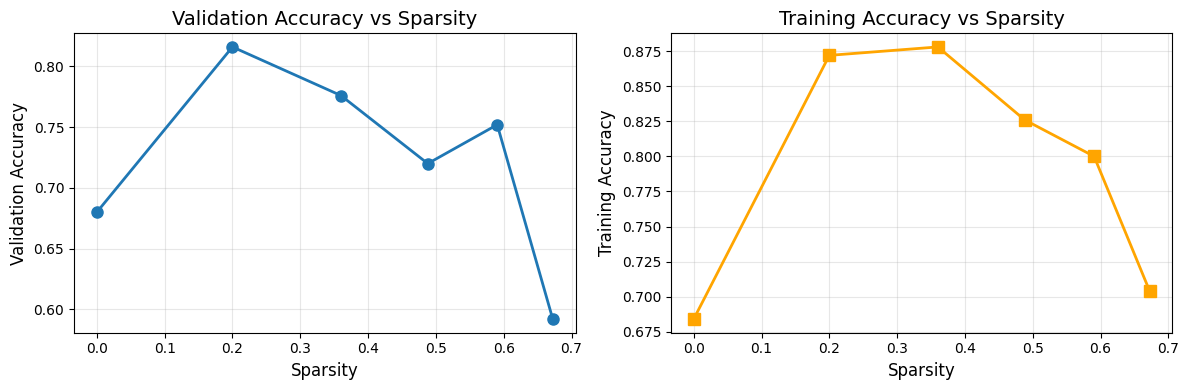

'\nif \'model\' in locals():\n    transfer_acc = test_transfer(model, \'sst2\', \'qqp\', epochs=2)\n    print(f"\nTransfer Learning Accuracy: {transfer_acc:.2%}")\n'

In [ ]:
# Data Processing Class
class DatasetProcessor:
    def __init__(self, tokenizer, max_length=128):
        self.tokenizer = tokenizer
        self.max_length = max_length

    def process_sst2(self, examples):
        return self.tokenizer(
            examples['sentence'],
            truncation=True,
            padding='max_length',
            max_length=self.max_length
        )

    def process_qqp(self, examples):
        return self.tokenizer(
            examples['question1'],
            examples['question2'],
            truncation=True,
            padding='max_length',
            max_length=self.max_length
        )

    def process_wnli(self, examples):
        return self.tokenizer(
            examples['sentence1'],
            examples['sentence2'],
            truncation=True,
            padding='max_length',
            max_length=self.max_length
        )

print(" DatasetProcessor class defined")

# Dataset Loading Function
def load_and_process_datasets(task_name, tokenizer, batch_size=32, subset_size=1000):
    """Load datasets with small subset for testing"""
    processor = DatasetProcessor(tokenizer)

    if task_name == 'sst2':
        dataset = load_dataset('stanfordnlp/sst2')
        process_fn = processor.process_sst2
        num_labels = 2
        label_col = 'label'
    elif task_name == 'qqp':
        dataset = load_dataset('glue', 'qqp')
        process_fn = processor.process_qqp
        num_labels = 2
        label_col = 'label'
    elif task_name == 'wnli':
        dataset = load_dataset('glue', 'wnli')
        process_fn = processor.process_wnli
        num_labels = 2
        label_col = 'label'
    else:
        raise ValueError(f"Unknown task: {task_name}")
    
    train_dataset = dataset['train'].select(range(min(subset_size, len(dataset['train']))))
    val_dataset = dataset['validation'].select(range(min(subset_size//4, len(dataset['validation']))))

    # Tokenize (keep labels)
    def tokenize_function(examples):
        tokenized = process_fn(examples)
        tokenized['labels'] = examples[label_col]
        return tokenized

    tokenized_train = train_dataset.map(tokenize_function, batched=True,
                                        remove_columns=train_dataset.column_names)
    tokenized_val = val_dataset.map(tokenize_function, batched=True,
                                    remove_columns=val_dataset.column_names)
    def collate_fn(batch):
        return {
            'input_ids': torch.tensor([item['input_ids'] for item in batch], dtype=torch.long),
            'attention_mask': torch.tensor([item['attention_mask'] for item in batch], dtype=torch.long),
            'labels': torch.tensor([item['labels'] for item in batch], dtype=torch.long)
        }

    train_loader = DataLoader(tokenized_train, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(tokenized_val, batch_size=batch_size, collate_fn=collate_fn)

    return train_loader, val_loader, num_labels

print(" Fixed dataset loading function - NOW IT WILL WORK!")

In [ ]:

# Lottery Ticket BERT Model Class

class LotteryTicketBERT(nn.Module):
    """BERT model with lottery ticket masking capabilities"""
    def __init__(self, model_name='bert-base-uncased', num_labels=2):
        super().__init__()
        self.model = AutoModelForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_labels
        )
        self.masks = {}
        self.init_weights = {}
        self._store_init_weights()

    def _store_init_weights(self):
        """Store initial weights for rewinding"""
        for name, param in self.model.named_parameters():
            self.init_weights[name] = param.data.clone()

    def rewind_weights(self):
        """Rewind weights to initialization (key for lottery tickets)"""
        with torch.no_grad():
            for name, param in self.model.named_parameters():
                if name in self.init_weights:
                    param.data.copy_(self.init_weights[name].to(param.device))

    def compute_mask_statistics(self):
        """Compute sparsity statistics"""
        total_params = 0
        pruned_params = 0

        for name, mask in self.masks.items():
            total_params += mask.numel()
            pruned_params += (mask == 0).sum().item()

        sparsity = pruned_params / total_params if total_params > 0 else 0
        return {
            'sparsity': sparsity,
            'total_params': total_params,
            'remaining_params': total_params - pruned_params
        }

    def apply_masks(self):
        """Apply masks to model parameters"""
        with torch.no_grad():
            for name, param in self.model.named_parameters():
                if name in self.masks:
                    mask = self.masks[name].to(param.device)
                    param.data *= mask

    def forward(self, **kwargs):
        self.apply_masks()
        return self.model(**kwargs)

    def to(self, device):
        """Override to method to move masks and init_weights too"""
        super().to(device)
        self.masks = {k: v.to(device) for k, v in self.masks.items()}
        self.init_weights = {k: v.to(device) for k, v in self.init_weights.items()}
        return self

class IterativeMagnitudePruning:
    """Implements IMP as described in the lottery ticket paper"""

    def __init__(self, model, pruning_rate=0.2):
        self.model = model
        self.pruning_rate = pruning_rate

    def global_magnitude_pruning(self, target_sparsity):
        """Global magnitude pruning across all layers"""
        all_weights = []
        weight_names = []

        for name, param in self.model.model.named_parameters():
            if 'weight' in name and 'LayerNorm' not in name:
                if name not in self.model.masks:
                    self.model.masks[name] = torch.ones_like(param.data)

                # Get masked weights
                masked_weights = param.data * self.model.masks[name]
                all_weights.append(masked_weights.abs().flatten())
                weight_names.append(name)

        if not all_weights:
            return

        all_weights_tensor = torch.cat(all_weights)

        k = int(all_weights_tensor.numel() * target_sparsity)
        if k > 0:
            threshold = torch.topk(all_weights_tensor.abs(), k, largest=False)[0].max()
        else:
            threshold = 0

        idx = 0
        for name, param in self.model.model.named_parameters():
            if name in weight_names:
                weight_magnitude = param.data.abs()
                new_mask = (weight_magnitude > threshold).float()
                self.model.masks[name] = self.model.masks[name] * new_mask

    def iterative_pruning_step(self, current_sparsity, target_sparsity):
        """One step of iterative pruning"""
        next_sparsity = current_sparsity + self.pruning_rate * (1 - current_sparsity)
        next_sparsity = min(next_sparsity, target_sparsity)

        self.global_magnitude_pruning(next_sparsity)

        return next_sparsity

print("IterativeMagnitudePruning class defined")


In [ ]:

def train_epoch(model, train_loader, optimizer, scheduler, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_idx, batch in enumerate(tqdm(train_loader, desc="Training")):

        if batch_idx == 0:
            for k, v in batch.items():
                if isinstance(v, torch.Tensor):
                    print(f"  {k}: {v.device}")
            for name, param in model.named_parameters():
                print(f"  {name}: {param.device}")
                if 'embedding' in name.lower():
                    print(f"EMBEDDING LAYER")
                break  
        batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v
                for k, v in batch.items()}

        if batch_idx == 0:
            for k, v in batch.items():
                if isinstance(v, torch.Tensor):
                    print(f"  {k}: {v.device}")

        outputs = model(**batch)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()

        with torch.no_grad():
            for name, param in model.model.named_parameters():
                if name in model.masks and param.grad is not None:
                    param.grad *= model.masks[name]

        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        predictions = outputs.logits.argmax(dim=-1)
        correct += (predictions == batch['labels']).sum().item()
        total += batch['labels'].size(0)

    return total_loss / len(train_loader), correct / total

print("Debug train_epoch loaded - run this first to see what's wrong")


# Main Lottery Ticket Training Function
def lottery_ticket_training(
    task_name='sst2',
    model_name='bert-base-uncased',
    target_sparsity=0.9,
    pruning_rate=0.2,
    epochs_per_round=3,
    batch_size=16,
    learning_rate=2e-5,
    subset_size=1000
):
    """Main lottery ticket training following the paper"""

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    train_loader, val_loader, num_labels = load_and_process_datasets(
        task_name, tokenizer, batch_size, subset_size
    )
    model = LotteryTicketBERT(model_name, num_labels).to(device)
    pruner = IterativeMagnitudePruning(model, pruning_rate)
    history = {
        'sparsity': [],
        'train_acc': [],
        'val_acc': []
    }
    tracker = CarbonTracker(epochs=-1,
                            log_dir='carbontracker/',
                            log_file_prefix=F"{model_name}_task={task_name}")
    current_sparsity = 0.0
    iteration = 0

    print(f"\n{'='*50}")
    print(f"Starting IMP for {task_name}")
    print(f"Target sparsity: {target_sparsity}")
    print(f"{'='*50}\n")

    while current_sparsity < target_sparsity:
        tracker.epoch_start()
        iteration += 1
        print(f"\n--- Iteration {iteration} ---")
        print(f"Current sparsity: {current_sparsity:.2%}")

        model.rewind_weights()

        optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
        total_steps = len(train_loader) * epochs_per_round
        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=total_steps // 10,
            num_training_steps=total_steps
        )

        for epoch in range(epochs_per_round):
            print(f"\nEpoch {epoch+1}/{epochs_per_round}")
            train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device)
            val_acc = evaluate(model, val_loader, device)
            print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2%}, Val Acc: {val_acc:.2%}")

        history['sparsity'].append(current_sparsity)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        if current_sparsity < target_sparsity:
            current_sparsity = pruner.iterative_pruning_step(current_sparsity, target_sparsity)
            stats = model.compute_mask_statistics()
            print(f"After pruning - Sparsity: {stats['sparsity']:.2%}")
            print(f"Remaining parameters: {stats['remaining_params']:,} / {stats['total_params']:,}")
        tracker.epoch_end()
    tracker.stop()

    print(f"\n{'='*50}")
    print("IMP Complete!")
    print(f"Final sparsity: {model.compute_mask_statistics()['sparsity']:.2%}")
    print(f"Final validation accuracy: {val_acc:.2%}")
    print(f"{'='*50}\n")

    return model, history


In [ ]:


#  Save/Load Functions for Google Drive
# ============================================
def save_to_google_drive(model, task_name, sparsity, history=None):
    """Save model, masks, and training history to Google Drive"""

    # Create filename
    filename = f"lottery_ticket_{task_name}_sparsity{int(sparsity*100)}.pt"
    filepath = os.path.join(save_dir, filename)

    # Prepare checkpoint
    checkpoint = {
        'model_state_dict': model.model.state_dict(),
        'masks': model.masks,
        'init_weights': model.init_weights,
        'sparsity_stats': model.compute_mask_statistics(),
        'task_name': task_name,
        'target_sparsity': sparsity
    }

    # Add training history if provided
    if history is not None:
        checkpoint['history'] = history

    # Save to Google Drive
    try:
        torch.save(checkpoint, filepath)
        print(f"Model saved to Google Drive: {filepath}")

        # Also save a JSON summary for easy viewing
        summary_path = filepath.replace('.pt', '_summary.json')
        summary = {
            'task_name': task_name,
            'target_sparsity': sparsity,
            'sparsity_stats': checkpoint['sparsity_stats'],
            'history': history if history else {}
        }
        with open(summary_path, 'w') as f:
            json.dump(summary, f, indent=2)
        print(f"Summary saved to: {summary_path}")

        return filepath
    except Exception as e:
        print(f"✗ Error saving to Google Drive: {e}")
        return None

def load_from_google_drive(task_name, sparsity, model_name='bert-base-uncased', num_labels=2):
    """Load a saved lottery ticket model from Google Drive"""

    filename = f"lottery_ticket_{task_name}_sparsity{int(sparsity*100)}.pt"
    filepath = os.path.join(save_dir, filename)

    if not os.path.exists(filepath):
        print(f"✗ Model not found: {filepath}")
        return None

    try:

        checkpoint = torch.load(filepath)
        model = LotteryTicketBERT(model_name, num_labels)
        model.model.load_state_dict(checkpoint['model_state_dict'])
        model.masks = checkpoint['masks']
        model.init_weights = checkpoint['init_weights']

        print(f"Model loaded from: {filepath}")
        print(f"Sparsity: {checkpoint['sparsity_stats']['sparsity']:.2%}")
        print(f"Remaining params: {checkpoint['sparsity_stats']['remaining_params']:,}")

        return model, checkpoint
    except Exception as e:
        print(f"✗ Error loading model: {e}")
        return None

# Transfer Testing Function
def test_transfer(source_model, source_task, target_task, epochs=2):
    """Test if lottery ticket from source task works on target task"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    train_loader, val_loader, num_labels = load_and_process_datasets(
        target_task, tokenizer, batch_size=16, subset_size=500
    )

    target_model = LotteryTicketBERT('bert-base-uncased', num_labels).to(device)
    target_model.masks = source_model.masks.copy()
    target_model.rewind_weights()

    optimizer = torch.optim.AdamW(target_model.parameters(), lr=2e-5)
    scheduler = get_linear_schedule_with_warmup(optimizer, 10, len(train_loader) * epochs)

    for epoch in range(epochs):
        train_epoch(target_model, train_loader, optimizer, scheduler, device)

    val_acc = evaluate(target_model, val_loader, device)
    print(f"Transfer from {source_task} to {target_task}: {val_acc:.2%}")

    return val_acc

print("Transfer testing function defined")


In [ ]:

# RUN SINGLE EXPERIMENT 
task = 'sst2'
sparsity = 0.7

print(f"\n{'='*60}")
print(f"Running experiment: {task} with target sparsity {sparsity}")
print(f"{'='*60}\n")

model, history = lottery_ticket_training(
    task_name=task,
    target_sparsity=sparsity,
    epochs_per_round=2,  # Reduced for demo
    subset_size=500,     # Small subset for demo
    batch_size=16
)

# Save the model
save_to_google_drive(model, task, sparsity, history)

# RUN MULTIPLE EXPERIMENTS 
"""
tasks = ['sst2', 'qqp']  # Add 'wnli' if needed
target_sparsities = [0.7, 0.9]  # Following the paper

results = {}

for task in tasks:
    for sparsity in target_sparsities:
        print(f"\n{'='*60}")
        print(f"Running experiment: {task} with target sparsity {sparsity}")
        print(f"{'='*60}")

        model, history = lottery_ticket_training(
            task_name=task,
            target_sparsity=sparsity,
            epochs_per_round=2,  # Reduced for demo
            subset_size=500  # Small subset for demo
        )

        # Save model to Google Drive
        save_to_google_drive(model, task, sparsity, history)

        # Store results
        results[f"{task}_{sparsity}"] = history

# Save all results summary
results_path = os.path.join(save_dir, 'all_results.json')
with open(results_path, 'w') as f:
    json.dump(results, f, indent=2)
print(f"\nAll results saved to: {results_path}")
"""

#  VISUALIZE RESULTS

if 'history' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy vs sparsity
    axes[0].plot(history['sparsity'], history['val_acc'],
                marker='o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Sparsity', fontsize=12)
    axes[0].set_ylabel('Validation Accuracy', fontsize=12)
    axes[0].set_title('Validation Accuracy vs Sparsity', fontsize=14)
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(history['sparsity'], history['train_acc'],
                marker='s', linewidth=2, markersize=8, color='orange')
    axes[1].set_xlabel('Sparsity', fontsize=12)
    axes[1].set_ylabel('Training Accuracy', fontsize=12)
    axes[1].set_title('Training Accuracy vs Sparsity', fontsize=14)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()

    # Save plot to Google Drive
    plot_path = os.path.join(save_dir, f'results_plot_{task}_sparsity{int(sparsity*100)}.png')
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    print(f"Plot saved to: {plot_path}")
    plt.show()

# LOAD AND TEST SAVED MODEL (Example)
"""
loaded_model, checkpoint = load_from_google_drive('sst2', 0.7)
if loaded_model:
    print("\n Model loaded successfully!")
    print(f"Sparsity stats: {checkpoint['sparsity_stats']}")
"""

#  TEST TRANSFER LEARNING (Example)
"""
if 'model' in locals():
    transfer_acc = test_transfer(model, 'sst2', 'qqp', epochs=2)
    print(f"\nTransfer Learning Accuracy: {transfer_acc:.2%}")
"""